# Integración numérica

---


In [1]:
from pylab import *

In [2]:
#Primero vemos si la malla tiene un número par o impar de puntos
 
def integra_h3(x,f):
    mod_f, int_f, h = len(f)%2, 0, x[1]-x[0] #VVe si tenemos card(puntos)=par o impar; variable para almacenar la integral numérica
    if mod_f == 0:
        for i in range(2, len(f), 2): #Iniciamos en dos y nos vamos saltando uno (para centrar el intervalo)
            int_f += f[i+1] + 4*f[i] +f[i-1]
        int_f = int_f/3
        #Pero tenemos que sumar el primer segmento que salió de no considerar un número par de puntos en la malla
        int_f += (23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] - 3*f[4])/48
    else: #Iniciamos programando esta parte
        for i in range(1, len(f), 2): #Inicia en 1, termina en len(f). Se va saltando el número del medio ej: a_a_a_a
            # print(i) #Imprime el número centrado.
            int_f += f[i+1] + 4*f[i] + f[i-1]
        int_f = int_f/3
    return int_f*h

Primera prueba

In [3]:
def int_chika(pini, pifi, f): 
    return (pifi-pini)*f[pifi]

In [4]:
def primitiva(x, y):
    y_primi = zeros(len(y))
    for punto in range(1, len(y), 2):
        y_primi[punto] = int_chika(punto, punto - 1, y)
    print(y_primi)

Int de y 2.6844267502148418e-06


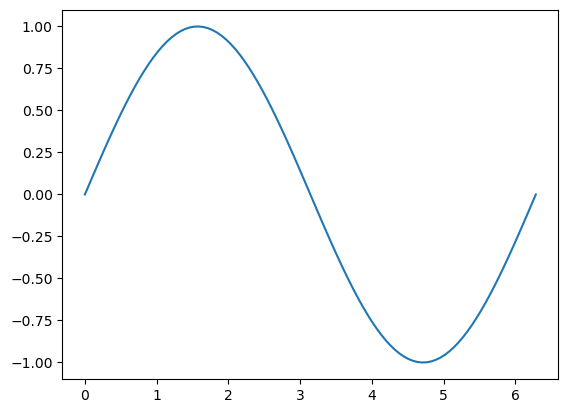

In [5]:
x = linspace(0, 2*pi, 100)
y = sin(x)
int_de_y = integra_h3(x, y)
print('Int de y', int_de_y)
plot(x, y)
show()

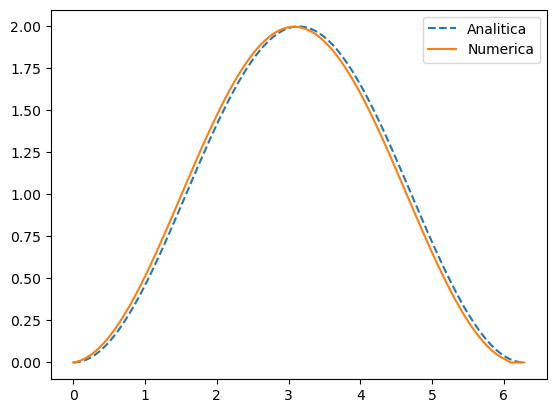

In [6]:
def primitiva_v1(x, f):
    #Falta adaptar esta función a _todos_ los puntos.
    h = x[1] - x[0]
    F = zeros_like(f)
    for i in range(1, len(f) - 4):
        F[i] = F[i-1] + (23*f[i] + 26*f[i+1] - 4*f[i+2] + 6*f[i+3] - 3*f[i+4])
    return F/48*h


Y = -cos(x)
prin_y = primitiva_v1(x,y)

plot(x, Y + 1, '--', label = 'Analitica')
plot(x, prin_y, label = "Numerica")
legend()
show()
        
    

In [9]:
#Ahora haremos la segunda versión de la primitiva
#Este algoritmo necesita de 4 puntos para sacar un solo valor. Y asigna el valor hasta el punto más a la derecha. 
#Si entonces tenemos 10 puntos experimentales, soloamente puede obtener 6.


def primitiva_v2(x,f):
    N, h = len(f), x[1] - x[0]
    if N%2 == 1: #Hay un número par de puntos
        print("Primer caso")
        N_cut = int((N-1)/2+1)
        x_c , F = zeros(N_cut), zeros(N_cut) #Es la cantidad de puntos que vamos a obtener,
        for i in range(N_cut):
            x_c[i] = x[2*i]
            
        for i in range(N_cut - 1):
            F[i + 1] = F[i] + (F[i + 1] + 4*F[i] + F[i-1])
            
        F = F/3 
    else:
        print("Segundo caso")
        N_cut = int(N/2 + 1)
        x_c, F = zeros(N_cut), zeros(N_cut) #Es la cantidad de puntos que vamos a tener.
        x_c[0] = x[0]
        for i in range(N_cut-1):
            x_c[i+1] = x[2*i + 1]
            
        F[1] = (23*F[0] + 26*F[1] - 4*F[2] + 6*F[3] - 3*F[4])*0.0625
        for i in range(1, N_cut - 2):
            F[i + 1] =  F[i] + (F[i + 1] + 4*f[i] + F[i-1])
        F = F / 3
    return x_c, F*h
        
        
x = linspace(0, pi)
y = sin(x)
x_c , prim_y = primitiva_v2(x, y)
print(x)
print(x_c)




Segundo caso
[0.         0.06411414 0.12822827 0.19234241 0.25645654 0.32057068
 0.38468481 0.44879895 0.51291309 0.57702722 0.64114136 0.70525549
 0.76936963 0.83348377 0.8975979  0.96171204 1.02582617 1.08994031
 1.15405444 1.21816858 1.28228272 1.34639685 1.41051099 1.47462512
 1.53873926 1.60285339 1.66696753 1.73108167 1.7951958  1.85930994
 1.92342407 1.98753821 2.05165235 2.11576648 2.17988062 2.24399475
 2.30810889 2.37222302 2.43633716 2.5004513  2.56456543 2.62867957
 2.6927937  2.75690784 2.82102197 2.88513611 2.94925025 3.01336438
 3.07747852 3.14159265]
[0.         0.06411414 0.19234241 0.32057068 0.44879895 0.57702722
 0.70525549 0.83348377 0.96171204 1.08994031 1.21816858 1.34639685
 1.47462512 1.60285339 1.73108167 1.85930994 1.98753821 2.11576648
 2.24399475 2.37222302 2.5004513  2.62867957 2.75690784 2.88513611
 3.01336438 3.14159265]


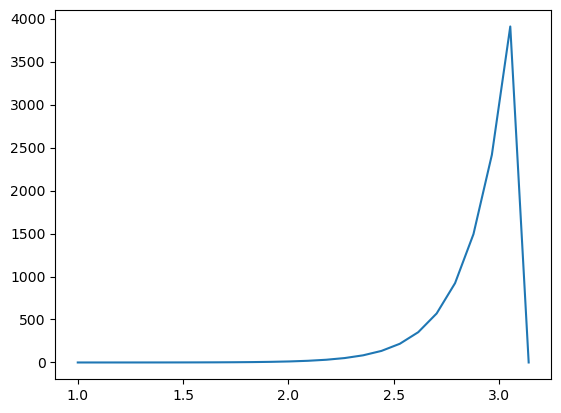

In [8]:
plot(x_c, prim_y)